# System Testing

ValueError: zero-size array to reduction operation minimum which has no identity

/home/gabriel/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


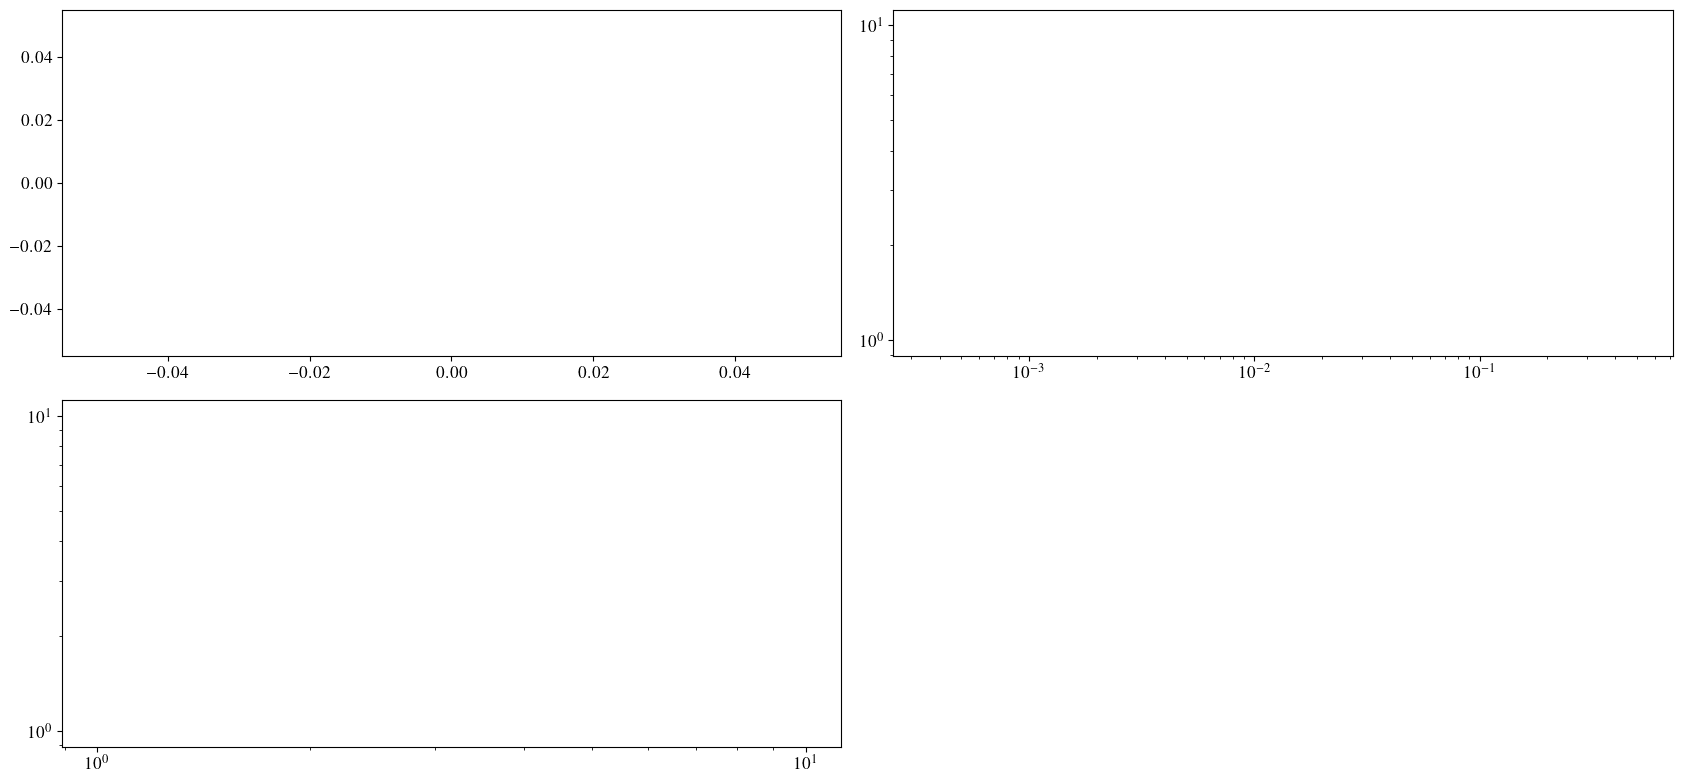

In [1]:
from computation import *
from computation.simulation import get_memory
import multiprocessing as mp
from pathlib import Path
import matplotlib.pyplot as plt

plt.figure(0, figsize=(17, 8))
system = Sandpile16Bit(5, 10, 7, False, False)
# print(get_memory())
# system.simulate(1_000_000)
# print(get_memory())
s = system.get_average_slopes()
plt.subplot(221)
plt.plot(range(len(s)), s)

plt.subplot(222)
r = system.generate_total_dissipation_rate(2800)
power = calculate_power_spectrum(r)[1:]
freq = calculate_power_frequencies(r)[1:]
# print(get_memory())


plt.xscale("log")
plt.yscale("log")
plt.scatter(freq, power, s=3)

plt.subplot(223)
plt.xscale("log")
plt.yscale("log")
edges, bins = get_avalanche_hist_3d(system=system)
# bins /= bins.sum()
print(bins.sum())
x, y = edges[0], bins.sum(axis=(1, 2))
# ind = y > 0
plt.scatter(x, y, s=3)

plt.subplot(224)
plt.plot(range(len(r)), r)


## 2D Simulations

In [2]:
from itertools import product
grid = [5, 10, 20, 40]
dim = 2
crit = 7
b = [True, False]
p = [True, False]
time_cut_off = [
    0, 50, 0, 100,
    10_000, 400, 0, 400,
    40_000, 1_000, 0, 1_000,
    400_000, 5_000, 0, 5_000
]
run_time = {
    5: 1_000_000,
    10: 1_000_000,
    20: 1_000_000,
    40: 1_000_000
}

data_dir = Path(f"./data/{dim}D")
data_dir.mkdir(exist_ok=True)



for t, (grid, b, p) in zip(time_cut_off, product(grid, b, p)):
    system = Sandpile16Bit(dim, grid, 7, b, p) # type: ignore
    system.time_cut_off = t
    r = run_time[grid]
    if grid == 40 and p == True and b == True:
        r *= 5
    run_multiple_samples(system, data_dir.absolute().__str__(), r, 2800, 200)

# system = Sandpile16Bit(dim, 40, 7, True, False) # type: ignore
# run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid] // 10, 2000, 1)





d2_g5_c7_op_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g5_c7_op_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g5_c7_cl_co:   0%|          | 0/2 [00:00<?, ?it/s]

No Avalanches generated for /home/gabriel/Documents/Uni/Sandpiles/Code/data/2D/d2_g5_c7_cl_co


d2_g5_c7_cl_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g10_c7_op_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g10_c7_op_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g10_c7_cl_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g10_c7_cl_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g20_c7_op_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g20_c7_op_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g20_c7_cl_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g20_c7_cl_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g40_c7_op_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g40_c7_op_nco:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g40_c7_cl_co:   0%|          | 0/2 [00:00<?, ?it/s]

d2_g40_c7_cl_nco:   0%|          | 0/2 [00:00<?, ?it/s]

# 3D Simulations

In [4]:

## 3D Simulations
from itertools import product


grid = [10, 20]
dim = 3
crit = 7
b = [True, False]
p = [True, False]
time_cut_off = [
    20_000, 2_000, 0, 2_000,
    600_000, 15_000, 0, 15_000,
    0, 100_000, 0, 100_000
]
run_time = {
    10: 1_000_000,
    20: 5_000_000,
    40: 5_000_000
}

data_dir = Path(f"./data/{dim}D")
data_dir.mkdir(exist_ok=True)

for t, (grid, b, p) in zip(time_cut_off, product(grid, b, p)):
    if b == False and p == True:
        continue
    if grid == 40:
        continue
    system = Sandpile16Bit(dim, grid, 7, b, p)  # type: ignore
    system.time_cut_off = t
    run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid], 3000, 50)

# system = Sandpile16Bit(dim, 40, 7, True, False) # type: ignore
# run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid] // 10, 2000, 1)



d3_g10_c7_op_co:   0%|          | 0/10 [00:00<?, ?it/s]

d3_g10_c7_op_nco:   0%|          | 0/10 [00:00<?, ?it/s]

d3_g10_c7_cl_nco:   0%|          | 0/10 [00:00<?, ?it/s]

d3_g20_c7_op_co:   0%|          | 0/10 [00:00<?, ?it/s]

d3_g20_c7_op_nco:   0%|          | 0/10 [00:00<?, ?it/s]

d3_g20_c7_cl_nco:   0%|          | 0/10 [00:00<?, ?it/s]

# 4D Simulations
    

In [16]:
## 4D Simulations
from itertools import product


grid = [15]
dim = 4
crit = 7
b = [True, False]
p = [True, False]
time_cut_off = [
    0, 150_000, 0, 150_000
]
run_time = {
    15: 1_000_000,
    20: 10_000_000,
    40: 10_000_000
}

data_dir = Path(f"./data/{dim}D")
data_dir.mkdir(exist_ok=True)

for t, (grid, b, p) in zip(time_cut_off, product(grid, b, p)):
    if b == False and p == True:
        continue
    if grid == 40:
        continue
    if b == True and p == True:
        continue
    system = Sandpile16Bit(dim, grid, 7, b, p)  # type: ignore
    system.time_cut_off = t
    run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid], 3000, 50)

# system = Sandpile16Bit(dim, 40, 7, True, False) # type: ignore
# run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid] // 10, 2000, 1)


d4_g15_c7_op_nco:   0%|          | 0/10 [00:00<?, ?it/s]

d4_g15_c7_cl_nco:   0%|          | 0/10 [00:00<?, ?it/s]

# 5D Simulations

In [17]:
## 5D Simulations
from itertools import product


grid = [10]
dim = 5
crit = 7
b = [True, False]
p = [True, False]
time_cut_off = [
    0, 200_000, 0, 200_000
]
run_time = {
    15: 1_000_000,
}

data_dir = Path(f"./data/{dim}D")
data_dir.mkdir(exist_ok=True)

for t, (grid, b, p) in zip(time_cut_off, product(grid, b, p)):
    if b == False and p == True:
        continue
    if b == True and p == True:
        continue
    system = Sandpile16Bit(dim, grid, 7, b, p)  # type: ignore
    system.time_cut_off = t
    run_multiple_samples(system, data_dir.absolute().__str__(), run_time[grid], 3000, 50)


d5_g15_c7_op_nco:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 